# British Airways Customer Reviews Analysis

### Introduction

British Airways (BA) is the flag carrier airline of the United Kingdom (UK). Every day, thousands of BA flights arrive to and depart from the UK, carrying customers across the world. Whether it’s for holidays, work or any other reason, the end-to-end process of scheduling, planning, boarding, fuelling, transporting, landing, and continuously running flights on time, efficiently and with top-class customer service is a huge task with many highly important responsibilities.

### Objective

As a data scientist at BA, it will be your job to apply your analytical skills to influence real life multi-million-pound decisions from day one, making a tangible impact on the business as your recommendations, tools and models drive key business decisions, reduce costs and increase revenue.

Customers who book a flight with BA will experience many interaction points with the BA brand. Understanding a customer's feelings, needs, and feedback is crucial for any business, including BA.

This first task is focused on scraping and collecting customer feedback and reviewing data from a third-party source and analysing this data to present any insights you may uncover.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Web Scraping from Skytrax

<a href=#three>3. DataFrame Creation and Column Addition

<a href=#four>4. Loading Data</a>

<a href=#five>5. Data Cleaning and Preprocessing</a>

<a href=#six>6. Exploratory Data Analysis (EDA)</a>

<a href=#seven>7. Topic Modeling</a>

<a href=#eight>8. Conclusion</a>

<a href=#nine>9. Recommendations</a>

<a href=#ten>10. References</a>


 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [1]:
# Web Scraping Libraries
import requests  # For making HTTP requests to web pages
from bs4 import BeautifulSoup  # For parsing HTML and XML documents

# Data Handling and Analysis Libraries
import numpy as np
import pandas as pd 

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Natural Language Processing Libraries
import re
from textblob import TextBlob  # For simplified text processing, including sentiment analysis
from wordcloud import WordCloud  # For creating word cloud visualizations

# Machine Learning Libraries for Text Analysis
from sklearn.feature_extraction.text import CountVectorizer  # For converting text documents to a matrix of token counts
from sklearn.decomposition import LatentDirichletAllocation  # For Latent Dirichlet Allocation (LDA) topic modeling

import warnings
warnings.filterwarnings('ignore')

 <a id="two"></a>
## 2. Web Scraping from Skytrax
<a href=#cont>Back to Table of Contents</a>

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url, 
                            timeout=10)  # Timeout set to 10 seconds
    

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


 <a id="three"></a>
## 3. DataFrame Creation and Column Addition
<a href=#cont>Back to Table of Contents</a>

In [3]:
# DataFrame Creation and Column Addition
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

reviews
0  cNot Verified |  I had hoped this would be a g...
1  ✅ Trip Verified |  I was going to fly to Frank...
2  ✅ Trip Verified | Much better experience this ...
3  ✅ Trip Verified | Once again a terrible busine...
4  ✅ Trip Verified |  BA A380's are showing their...

In [4]:
df.to_csv("data/BA_reviews.csv")

 <a id="four"></a>
## 4. Loading Data
<a href=#cont>Back to Table of Contents</a>

### Checking the first and the last few rows in the data frame, 'df'

In [5]:
df 

reviews
0    cNot Verified |  I had hoped this would be a g...
1    ✅ Trip Verified |  I was going to fly to Frank...
2    ✅ Trip Verified | Much better experience this ...
3    ✅ Trip Verified | Once again a terrible busine...
4    ✅ Trip Verified |  BA A380's are showing their...
..                                                 ...
995  Not Verified |  I've always favoured British A...
996  ✅ Trip Verified | New York to London via Genev...
997  ✅ Trip Verified | A380 boarding is always a ni...
998  ✅ Trip Verified | \r\nThe 2-3-2 seating in the...
999  ✅ Trip Verified |  London to Johannesburg. Smo...

[1000 rows x 1 columns]

#### Looking the data to check for basic information, missing values & duplicated values

The data contain just one column of string data type with no missing values

#### Checking for duplicated values

In [6]:
df.duplicated().sum()

0

 <a id="five"></a>
## 5. Data Cleaning and Preprocessing
<a href=#cont>Back to Table of Contents</a>

### Data Cleaning 

**Noise Entity Removal**

Noise Entity Removal
- Removing unwanted words, characters, and special patterns such as 'Trip Verified', '✅', |, 's and so on

In [9]:
def clean_text_simple(text):
    """
    Clean the input text by removing specific unwanted text, converting to lowercase,
    and removing specified characters or patterns.

    Parameters:
    text (str): The text to be cleaned.

    Returns:
    str: The cleaned text.
    """
    # Remove 'Trip Verified' text
    text = text.replace('✅ Trip Verified |', '')

    # Convert to lowercase for uniformity
    text = text.lower()

    # Remove specific characters or patterns
    # Example: Removing ellipsis (...) and other patterns if needed
    text = re.sub(r'\.\.\.', '', text)  # Removes ellipsis
    text = re.sub(r'\'s', '', text)  # Removes 's
    text = text.replace('-', '')  # Removes hyphens

    return text

# Apply the cleaning function to the 'reviews' column of the dataframe
df['Reviews'] = df['reviews'].apply(clean_text_simple)

# Display the first few rows of the cleaned dataframe
df.head()

reviews  \
0  cNot Verified |  I had hoped this would be a g...   
1  ✅ Trip Verified |  I was going to fly to Frank...   
2  ✅ Trip Verified | Much better experience this ...   
3  ✅ Trip Verified | Once again a terrible busine...   
4  ✅ Trip Verified |  BA A380's are showing their...   

                                             Reviews  
0  cnot verified |  i had hoped this would be a g...  
1    i was going to fly to frankfurt from glasgow...  
2   much better experience this time around. flew...  
3   once again a terrible business class experien...  
4    ba a380 are showing their age, hopefully the...

### Analysis of the Sentiment Distribution

#### Calculating the Polarity and Subjectivity of the Reviews using TextBlob and drop reviews column

In [10]:
def calculate_sentiment(text):
    """
    Calculate the sentiment polarity and subjectivity of the given text.

    This function uses TextBlob to analyze the given text and returns both
    the sentiment polarity and subjectivity. The polarity score is a float within
    the range [-1.0, 1.0], where -1.0 is very negative, 0 is neutral, and 1.0 is very positive.
    The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective
    and 1.0 is very subjective.

    Parameters:
    text (str): The text to be analyzed for sentiment.

    Returns:
    tuple: A tuple containing two float values:
        - Polarity of the sentiment (float)
        - Subjectivity of the sentiment (float)
    """
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Apply the function to the reviews column and create two new columns
df['Polarity'], df['Subjectivity'] = zip(*df['Reviews'].apply(calculate_sentiment))

# Display the dataframe with sentiment scores
df.head()

reviews  \
0  cNot Verified |  I had hoped this would be a g...   
1  ✅ Trip Verified |  I was going to fly to Frank...   
2  ✅ Trip Verified | Much better experience this ...   
3  ✅ Trip Verified | Once again a terrible busine...   
4  ✅ Trip Verified |  BA A380's are showing their...   

                                             Reviews  Polarity  Subjectivity  
0  cnot verified |  i had hoped this would be a g...  0.004630      0.367454  
1    i was going to fly to frankfurt from glasgow...  0.050758      0.364192  
2   much better experience this time around. flew...  0.179804      0.522717  
3   once again a terrible business class experien... -0.128462      0.359744  
4    ba a380 are showing their age, hopefully the...  0.162037      0.674074

#### Dropping  'reviews' column

In [11]:
# Create a new DataFrame 'df_new' by dropping the 'reviews' column from 'df'
df_new = df.drop(['reviews'], 
                           axis = 1)
df_new.head()

Reviews  Polarity  Subjectivity
0  cnot verified |  i had hoped this would be a g...  0.004630      0.367454
1    i was going to fly to frankfurt from glasgow...  0.050758      0.364192
2   much better experience this time around. flew...  0.179804      0.522717
3   once again a terrible business class experien... -0.128462      0.359744
4    ba a380 are showing their age, hopefully the...  0.162037      0.674074

### Sentiment Analysis using Polarity and Subjectivity

In [13]:
def analyze_sentiment(review):
    """
    Analyze the sentiment and subjectivity of a review.

    Parameters:
    review (str): A text string containing the review.

    Returns:
    tuple: A tuple containing the polarity score (float),
           the subjectivity score (float), and the sentiment category 
           ('Positive', 'Neutral', 'Negative') based on the polarity.
    """
    analysis = TextBlob(review)
    polarity = analysis.sentiment.polarity
    subjectivity = analysis.sentiment.subjectivity

    if polarity > 0:
        sentiment = 'Positive'
    elif polarity == 0:
        sentiment = 'Neutral'
    else:
        sentiment = 'Negative'

    return polarity, subjectivity, sentiment

# Apply the sentiment analysis function to the reviews column
df_new['Polarity'], df_new['Subjectivity'], df_new['Sentiment'] = zip(*df_new['Reviews'].apply(analyze_sentiment))

# Display the first few rows of the DataFrame with the sentiment, polarity, and subjectivity columns
df_new.head()

Reviews  Polarity  Subjectivity  \
0  cnot verified |  i had hoped this would be a g...  0.004630      0.367454   
1    i was going to fly to frankfurt from glasgow...  0.050758      0.364192   
2   much better experience this time around. flew...  0.179804      0.522717   
3   once again a terrible business class experien... -0.128462      0.359744   
4    ba a380 are showing their age, hopefully the...  0.162037      0.674074   

  Sentiment  
0  Positive  
1  Positive  
2  Positive  
3  Negative  
4  Positive

 <a id="six"></a>
## 6. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

### Using Histogram to visualize the Polarity and Subjectivity Distribution

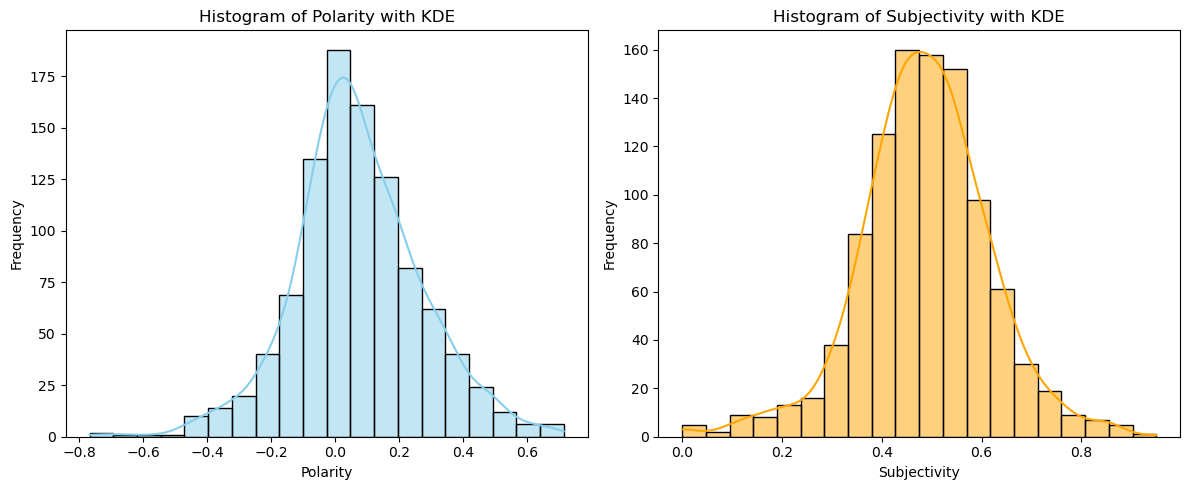

In [14]:
# Create subplots for both histograms
fig, axes = plt.subplots(1, 
                         2, 
                         figsize=(12, 5))

# Plot 1: Histogram of Polarity with KDE
sns.histplot(df_new['Polarity'], 
             bins=20, kde=True, 
             color='skyblue', 
             ax=axes[0])
axes[0].set_title('Histogram of Polarity with KDE')
axes[0].set_xlabel('Polarity')
axes[0].set_ylabel('Frequency')

# Plot 2: Histogram of Subjectivity with KDE
sns.histplot(df_new['Subjectivity'], 
             bins=20, 
             kde=True, 
             color='orange', 
             ax=axes[1])
axes[1].set_title('Histogram of Subjectivity with KDE')
axes[1].set_xlabel('Subjectivity')
axes[1].set_ylabel('Frequency')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

The **histograms** above depict the distribution of polarity and subjectivity scores derived from the customer review dataset. Polarity scores are a quantitative representation of sentiment, ranging from -1 (indicating a negative sentiment), through 0 (a neutral standpoint), to +1 (a positive sentiment). Subjectivity scores, on the other hand, measure the text's objectivity, scaling from 0 for objective, fact-based content, to 1 for subjective, opinion-based content.

**Insights from Polarity Distribution:**

- Average Sentiment Trend: The distribution's mean polarity marginally dips below the neutral midpoint, revealing a tendency towards negative sentiment across the reviews. This pattern could reflect prevalent customer discontent and highlight areas necessitating enhanced focus and improvement.

- Variability in Sentiment: The polarity's distribution span showcases a spectrum of sentiments, capturing diverse customer experiences that range from distinctly negative to moderately positive. Investigating this sentiment variability could yield insights into specific airline services that elicit divergent customer reactions.

- Distribution Skewness: An observed skew towards the lower end of the polarity scale suggests a subset of reviews with pronounced negative sentiment. Further examination of these critical outliers is crucial to identify and rectify the underlying issues that contribute to substantial customer grievances.

**Insights from Subjectivity Distribution:**

- Nature of Reviews: The subjectivity scores cluster just below the midpoint, indicating a moderate degree of subjectivity in the reviews. This suggests a balanced mix of personal opinion and factual reporting within the customer feedback.

- Prevalence of Objective Reviews: The presence of reviews at the lower end of the subjectivity scale points to objective commentary within the dataset. These could be linked to concrete service aspects, such as logistical efficiency or procedural adherence, and warrant a separate analytical approach to differentiate service attributes from subjective customer experiences.

- Equilibrium of Opinions: The symmetrical configuration of the subjectivity histogram denotes an even-handed distribution of opinionated content within the reviews. Discerning the elements that influence heightened subjectivity scores is pivotal for a deeper understanding of customer expectations and the experiential factors driving those perspectives.

### Using Bar Plots to Visualize Sentiment Distribution

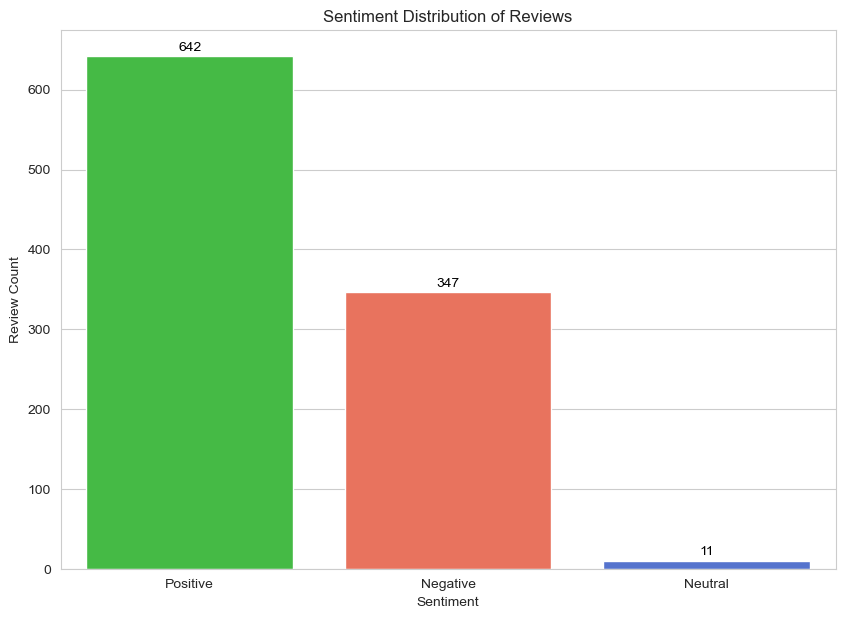

In [16]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Define colors for each sentiment category 
colors = ["limegreen", 
          "tomato", 
          "royalblue"]  

# Plotting the sentiment distribution
plt.figure(figsize=(10, 7))
ax = sns.countplot(x=df_new['Sentiment'],
                   order=['Positive', 
                          'Negative', 
                          'Neutral'],
                   palette=colors)

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 6),
                textcoords='offset points',
                fontsize=10,
                color='black')

plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Review Count')
plt.show()

**The above bar plot conveys the sentiment distribution across a set of customer reviews, segmented into three distinct categories: Positive, Negative, and Neutral**
- The predominant height of the Positive sentiment bar indicates a majority of favorable evaluations, overshadowing the less frequent Negative sentiments and the scarcely represented Neutral feedback. This distribution implies a favorable overall perception by the reviewers, with a substantial number expressing satisfaction. The lesser, yet significant, volume of Negative reviews highlights areas where improvements could be beneficial. The scarcity of Neutral sentiment suggests that the experiences being reviewed generally elicit a definitive opinion, either affirmatively or adversely. Collectively, the plot underscores the importance of the Positive sentiments while also acknowledging the critical insights that can be derived from the Negative feedback to drive service enhancements.

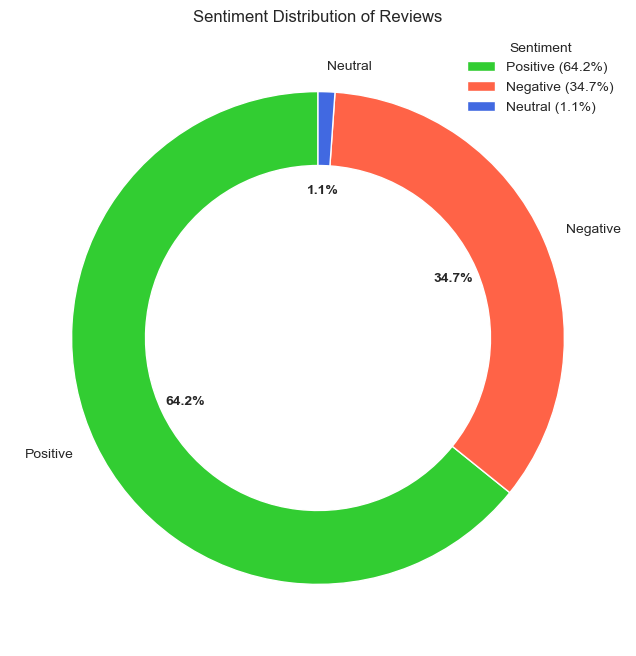

In [17]:
# Calculate the percentage distribution
percentage_distribution = df_new['Sentiment'].value_counts(normalize=True) * 100

# Define colors for each sentiment category 
colors = ["limegreen", 
          "tomato", 
          "royalblue"]

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(8, 8))

# Pie chart
wedges, _, autotexts = ax.pie(percentage_distribution,
                               labels=percentage_distribution.index,
                               autopct='%1.1f%%',
                               startangle=90,
                               colors=colors,
                               wedgeprops=dict(width=0.3, edgecolor='w'))

# Add percentage values inside the pie chart
for autotext in autotexts:
    autotext.set_ha('center')
    autotext.set_va('center')
    autotext.set_fontweight('bold')

# Place legend in the top right corner
ax.legend(wedges, 
          [f'{label} ({percentage:.1f}%)' for label, 
           percentage in zip(percentage_distribution.index, 
                             percentage_distribution)],
          title="Sentiment", 
          loc="upper right",
          bbox_to_anchor=(1, 1), 
          fontsize='medium', 
          frameon=False)

plt.title('Sentiment Distribution of Reviews')
plt.show()

The chart reveals a comprehensive breakdown of sentiments within a dataset of 1000 customer reviews. Notably, a significant majority of reviews, accounting for approximately 64.2%, express positive sentiments, reflecting a widespread satisfaction among customers. Conversely, 34.7% of the reviews convey a negative sentiment, pinpointing areas that might require attention for improvement. A minimal 1.1% of customers provided a neutral reviews, underscoring the rare occurrence of ambivalent opinions. This insightful distribution highlights the overwhelmingly positive reception while also shedding light on specific aspects that may benefit from further refinement.

### Using Word Cloud to Visulize Top 20 Positive Reviews

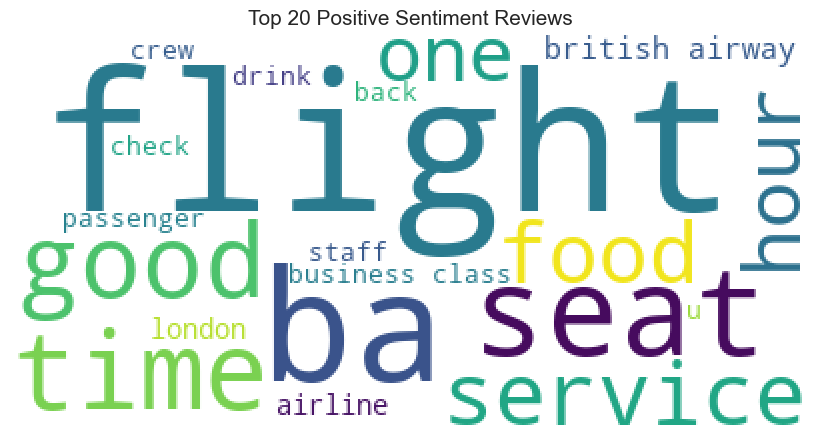

In [18]:
# Filter the DataFrame for positive sentiment
positive_text = ' '.join(df_new[df_new['Sentiment'] == 'Positive']['Reviews'])

# Generate a word cloud for the top 20 words in positive sentiment
wordcloud = WordCloud(width=400, height=200, 
                      background_color='white', 
                      stopwords=None, 
                      min_font_size=10,
                      max_words=20).generate(positive_text)

# Plot the WordCloud image for positive sentiment
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.title('Top 20 Positive Sentiment Reviews', size=15)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

**The word cloud above represent Positive Sentiment Reviews. It is a visual compilation of the most frequently mentioned terms within favorable feedback. It highlights areas of customer satisfaction through the prominence of certain words, reflecting key aspects of the airline's service that have resonated positively with passengers. The following insights can be gleaned from the areas of importance indicated by the size and frequency of the words:**

- **Service:** Its prominence in the word cloud underscores the crucial role that quality service plays in creating positive customer experiences. The emphasis on service points to its perceived value among passengers.

- **Seat:** The conspicuousness of this word suggests that seating—both its comfort and the options available—is a significant contributor to passenger satisfaction.

- **Food and Drink:** These terms are noticeable and indicate that the food and beverage offerings on board are generally appreciated by customers, contributing positively to their overall experience.

- **Flight:** The word 'flight' appears large and central, indicating that it is a common theme in positive reviews. This likely pertains to the general flight experience, encompassing various elements such as punctuality, smoothness of the journey, and overall comfort.

- **Crew:** The word 'crew' is indicative of favorable interactions or experiences with the airline's staff, highlighting the impact of personal service on the flight experience.

- **British Airways (BA):** The presence of the airline's name in the word cloud, associated with positive reviews, suggests customers have a favorable perception of the brand.

- **Business Class:* The term 'business class' is distinct within the cloud, which points to a higher level of satisfaction among passengers traveling in this premium category.

*These insights reflect the airline's successful areas from the perspective of its customers and can be used to maintain and enhance service quality where it is most appreciated.*

### Visualizing Top 20 Negative Reviews

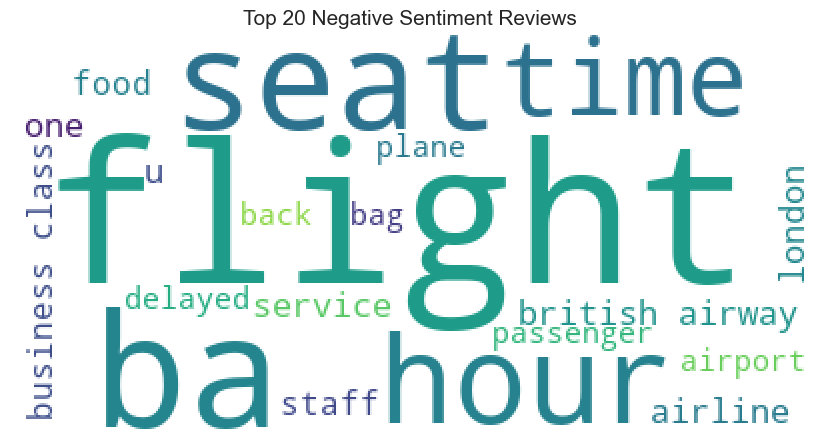

In [19]:
# Filter the DataFrame for negative sentiment
negative_text = ' '.join(df_new[df_new['Sentiment'] == 'Negative']['Reviews'])

# Generate a word cloud for the top 20 words in positive sentiment
wordcloud = WordCloud(width=400, height=200, 
                      background_color='white', 
                      stopwords=None, 
                      min_font_size=10,
                      max_words=20).generate(negative_text)

# Plot the WordCloud image for negative sentiment
plt.figure(figsize=(8, 8), 
           facecolor=None)
plt.imshow(wordcloud)
plt.title('Top 20 Negative Sentiment Reviews', 
          size=15)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

**The word cloud for Negative Sentiment Reviews displays the words most commonly found in unfavorable British Airways reviews, giving us clues about what might be upsetting customers. The size and prominence of certain words highlight the primary concerns:**

- **Time and Delayed:** These big words in the cloud tell us that customers often mention being unhappy about flights not being on time. This includes flights leaving late or taking too long.

- **Seat:** Since 'seat' pops up a lot in negative reviews, it seems that people are not always happy with their seating. It could be because the seats aren't comfortable, there's not enough room, or they had trouble getting the seat they wanted.

- **Food:** 'Food' shows up in both good and bad reviews, which means that sometimes the meals on the plane are a hit, and other times people really don't like them.

- **Staff:** The word 'staff' here suggests that sometimes the people working on the plane or at the airport might not be making customers happy, maybe because they aren't as helpful or friendly as expected.

- **London:** Seeing 'London' in the cloud hints that some problems might be linked to flights going to or coming from London, or maybe things happening at London's airports.

*These insights draw attention to the operational and service areas where the airline could focus its improvements to enhance customer satisfaction and reduce negative feedback.*

### Visualizing Top 20 Neautral Reviews

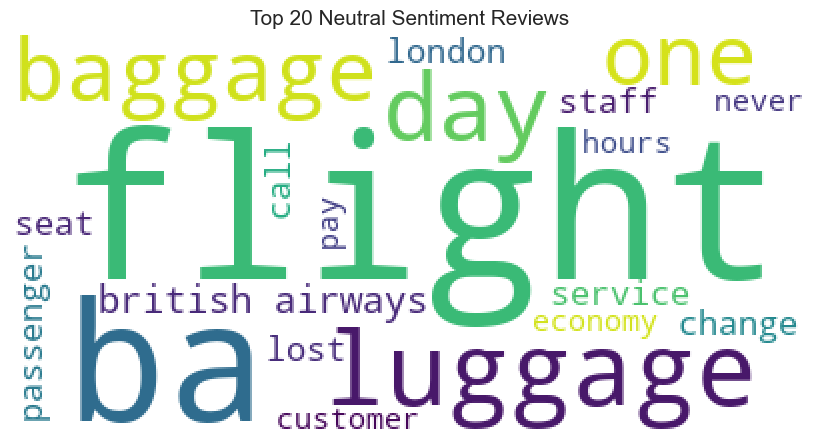

In [20]:
# Filter the DataFrame for neutral sentiment
neutral_text = ' '.join(df_new[df_new['Sentiment'] == 'Neutral']['Reviews'])

# Generate a word cloud for the top 20 words in neutral sentiment
wordcloud = WordCloud(width=400, height=200, 
                      background_color='white', 
                      stopwords=None, 
                      min_font_size=10,
                      max_words=20).generate(neutral_text)

# Plot the WordCloud image for neutral sentiment
plt.figure(figsize=(8, 8), 
           facecolor=None)
plt.imshow(wordcloud)
plt.title('Top 20 Neutral Sentiment Reviews', 
          size=15)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

**The word cloud for Neutral Sentiment Reviews related to British Airways reveals the words that frequently come up in feedback that isn't strongly positive or negative. These words reflect aspects of the airline service that customers tend to mention without expressing a clear like or dislike. Here's what stands out:**

- **Baggage and Luggage:** These words are noticeable, suggesting that handling luggage is a frequent topic among customers. Since the sentiment is neutral, it seems that passengers are neither overly impressed nor disappointed with their baggage handling experiences.

- **Customer Service:** The word 'service' shows up in a neutral light, indicating that customer service interactions are perhaps standard and as expected, without being exceptionally good or bad.

- **Day, Hours, Economy:** These words likely refer to typical travel details such as the time of day, the duration of flights, or flying in economy class. Their presence in neutral reviews suggests that they are part of the normal flying experience, without significant impact on passenger satisfaction.

- **Call, Change, Lost:** These terms may relate to common travel-related actions like making phone calls to the airline, changing reservations, or dealing with lost items. Their appearance in a neutral context implies that they are regular occurrences that don't usually evoke strong emotions.

- **British Airways (BA):** The airline's name appearing in a neutral context might mean that while passengers frequently mention the airline, it's often in a matter-of-fact way without strong praise or criticism.

- **Staff:** The mention of 'staff' without strong sentiment could suggest that interactions with airline personnel are generally average, not particularly notable in either a positive or negative sense.

*The neutral word cloud indicates areas of the airline's service that are viewed as standard by customers, neither adding to nor detracting from the overall experience in a significant way.*

### Analysis of the Most Common Words

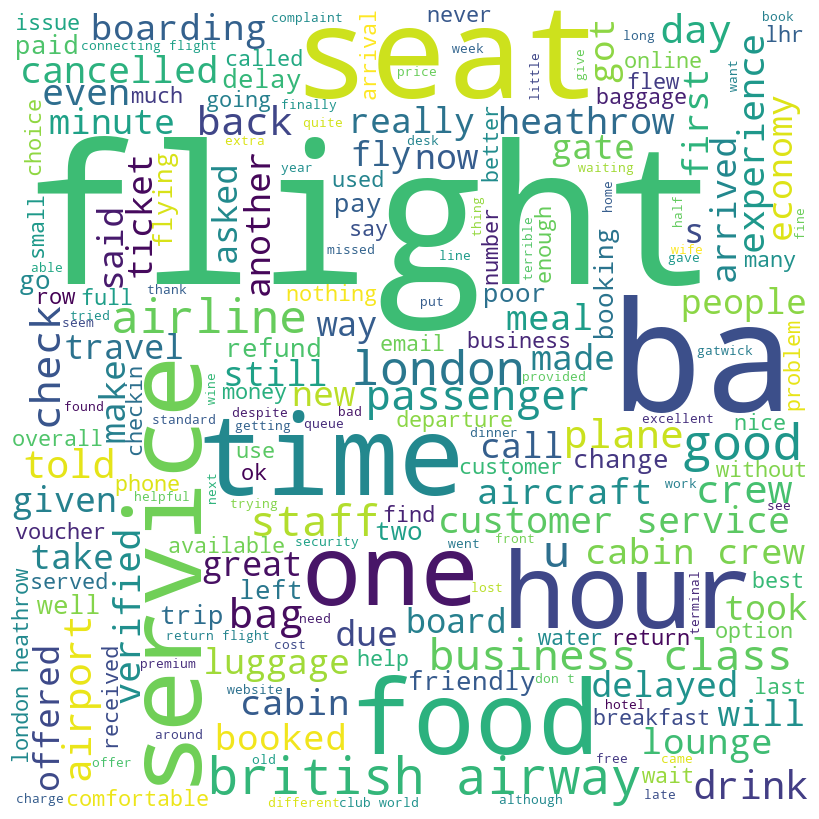

In [21]:
# Generate a word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(' '.join(df_new['Reviews']))

# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 

plt.show()

**From the WordCloud above, the following insights can be observed:**

**Service Quality:**
- Words like "service" and "staff" are prominent, suggesting that these are frequently mentioned topics in the reviews. The size of the word "good" implies positive feedback about some aspects of the service.

**Key Aspects of Experience:** 
- The words "seat," "food," "business class," and "lounge" are quite large, indicating these are important factors in the customer reviews. They may represent areas where customers have strong opinions or which significantly impact their overall experience.

**Sentiment:** 
- The presence of both positive ("good," "friendly," "excellent") and negative ("poor," "cancelled," "delayed") terms suggests a mix of sentiments. The sentiment seems varied, with some customers having positive experiences and others facing issues.

**Specific Issues:** 
- Words such as "cancelled," "delayed," "refund," and "baggage" indicate specific areas of complaint. These issues are likely points of frustration for customers and could be significant pain points that the airline needs to address.

**Areas of Satisfaction:**
- On the positive side, words like "comfortable" and "friendly" suggest aspects of the service that customers appreciate. The word "business" could imply that business class service is a topic of positive reviews.

**Customer Expectations:** 
- The recurrence of words like "seat" and "food" emphasizes their importance in customer expectations regarding their flying experience.

**Operational Aspects:** 
- Terms like "check," "gate," and "Heathrow" (which is a major airport) hint at operational elements of the flying experience that are noteworthy to customers.

**Booking and Traveling Experience:** 
- The word "booking" and the presence of "London" indicate that the booking process and specific travel routes or locations are relevant to customers.

 <a id="seven"></a>
## 7. Topic Modeling
<a href=#cont>Back to Table of Contents</a>

#### Using CountVectorizer and LatentDirichletAllocation for Topic Modeling

**Text vectorization** is the process of converting textual data into a numerical representation, allowing machine learning algorithms to work with text. It involves transforming text documents into feature vectors. We will be using Count Vectorizer to perform this operation.

**CountVectorizer** is a feature extraction technique used in natural language processing (NLP) to convert text data into numerical feature vectors. It is a part of the scikit-learn library in Python. CountVectorizer operates by tokenizing text documents, converting them into a matrix of token counts.

In [31]:
# Feature Engineering using CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, 
                                stop_words='english')
tf = tf_vectorizer.fit_transform(df_new['Reviews'])

# Extract feature names from CountVectorizer
feature_names = tf_vectorizer.get_feature_names_out()

**Modelling**

**Latent Dirichlet Allocation (LDA)** LDA is often categorized as a topic modeling technique, it can also be considered a form of feature engineering. It processes the features created by CountVectorizer (or another vectorizer) to discover the underlying topics in a text corpus. In doing so, it generates a new set of features related to the topics within the documents. Each document is then described by its distribution of topics, and each topic is characterized by its distribution of words. These topic distributions can be used as features in downstream tasks, such as document classification, clustering, or as part of a recommendation system.

In [32]:
# Define the number of topics
n_components = 5  # Finding just 5 topics

# Topic Modeling using Latent Dirichlet Allocation
lda = LatentDirichletAllocation(n_components=n_components, 
                                max_iter=5, 
                                learning_method='online', 
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=0)

### Prining Out 10 Top Words for each Topic Identified by LDA the Model

In [34]:
def print_top_words(model, feature_names, n_top_words):
    """
    Print the top words for each topic identified by the LDA model.

    Parameters:
    model (LatentDirichletAllocation): The trained LDA model.
    feature_names (list): List of feature names obtained from the vectorizer.
    n_top_words (int): Number of top words to print for each topic.
    """
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

# Example usage
n_top_words = 10  # Set the number of top words you want to display for each topic
print_top_words(lda, feature_names, n_top_words)

Topic #1: class, flight, food, good, seat, ba, business, service, crew, seats
Topic #2: flight, ba, tokyo, british, airways, tour, service, crew, heathrow, lhr
Topic #3: flight, ba, service, london, time, british, airways, staff, hours, heathrow
Topic #4: flight, ba, airline, hours, time, luggage, help, airport, nov, airways
Topic #5: flight, heading, seats, ba, airways, british, flights, london, glory, airport


### Using WordCloud to visulaize each Topics

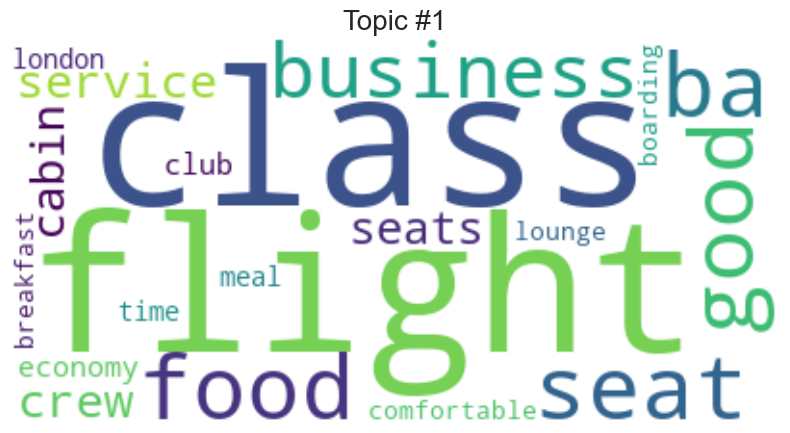

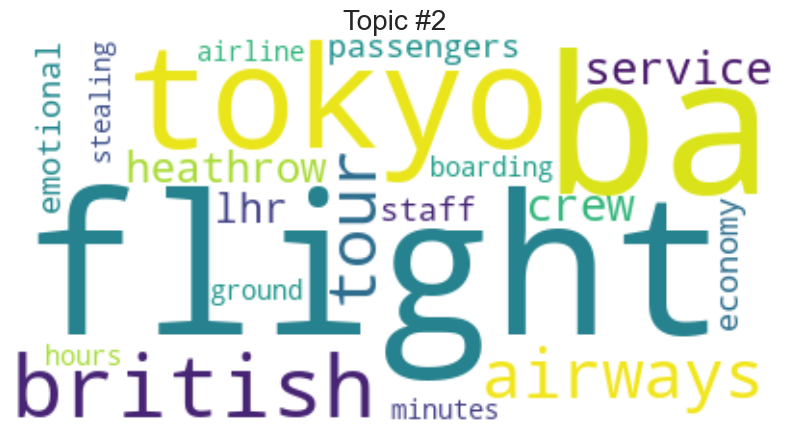

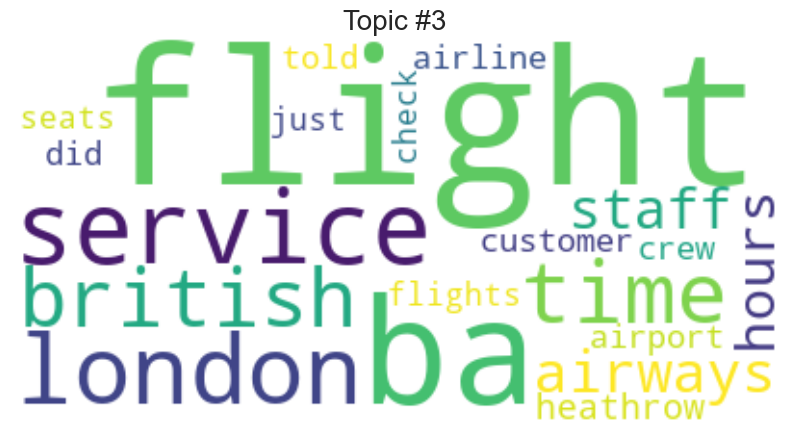

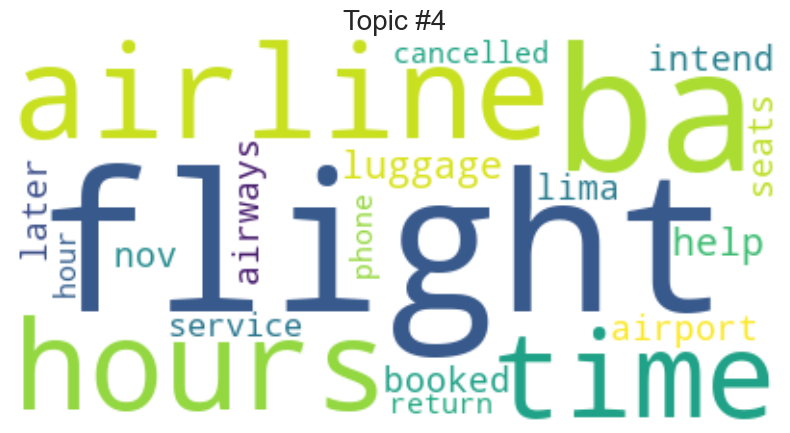

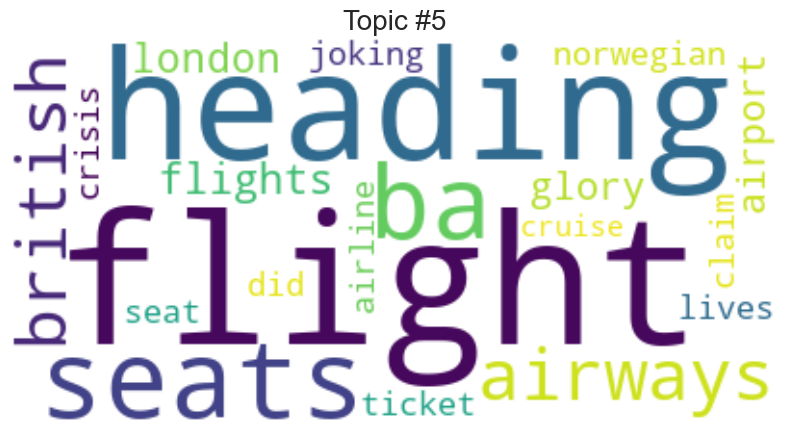

In [35]:
def plot_word_clouds(model, feature_names, n_top_words, n_topics):
    """
    Print the top words for each topic identified by the LDA model.
    
    The function iterates through each topic identified by the LDA model,
    sorts the terms in each topic by their importance, and prints out the
    top terms in each topic. This is useful for understanding the main
    themes or concepts within each topic.

    Parameters:
    model (LatentDirichletAllocation): The trained LDA model.
    feature_names (list): List of feature names obtained from the vectorizer.
    n_top_words (int): Number of top words to print for each topic.
    """
    for topic_idx, topic in enumerate(model.components_):
        # Pull the words corresponding to that topic
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_words = {feature_names[i]: topic[i] for i in top_features_ind}

        # Generate the word cloud
        wordcloud = WordCloud(width=400, 
                              height=200,
                              background_color='white')
        wordcloud.generate_from_frequencies(top_words)
        
        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Topic #{topic_idx + 1}', size=20)
        plt.show()

# Number of topics and top words to display
n_topics = lda.n_components
n_top_words = 20

# Plot WordClouds for all topics
plot_word_clouds(lda, feature_names, n_top_words, n_topics)

**Topic 1:**

- Dominant words: class, flight, food, good, seat, ba, business, service, crew, seats
- Insight: This topic highlights experiences related to flying in business class. Customers appreciate the quality of service, good food, and comfortable seats provided by British Airways. The use of "business" suggests a positive sentiment associated with premium class travel.

**Topic 2:**

- Dominant words: flight, ba, tokyo, british, airways, tour, service, crew, heathrow, lhr
- Insight: This topic centers around flights to Tokyo with British Airways. Customers discuss the service quality, crew interactions, and possibly experiences at Heathrow Airport ("heathrow" and "lhr"). The term "tour" indicates a potential discussion about travel tours or sightseeing activities associated with these flights.

**Topic 3:**

- Dominant words: flight, ba, service, london, time, british, airways, staff, hours, heathrow
- Insight: This topic focuses on flights to and from London, particularly Heathrow. Customers discuss the service quality, staff interactions, and possibly the duration of flights ("hours"). The mention of "heathrow" suggests a connection to the London airport.

**Topic 4:**

- Dominant words: flight, ba, airline, hours, time, luggage, help, airport, nov, airways
- Insight: This topic covers various aspects of flying with British Airways, including discussions about the airline itself, help with luggage, and experiences at the airport. The mention of "nov" might be related to specific events or experiences in November.

**Topic 5:**

- Dominant words: flight, heading, seats, ba, airways, british, flights, london, glory, airport
- Insight: This topic encompasses discussions about flights with British Airways, focusing on aspects such as seat comfort, heading to different destinations, and experiences at airports. The term "glory" suggests positive or memorable experiences associated with flying.

*Each word cloud represents a different facet of the flying experience, with Topics 1 and 2 focusing on premium class and flights to Tokyo, Topic 3 on flights to and from London, Topic 4 on general airline experiences, and Topic 5 on overall flight experiences and destinations.*

 <a id="eight"></a>
## 8. Conclusion
<a href=#cont>Back to Table of Contents</a>

### Conclusion

In conclusion, this comprehensive analysis of British Airways customer reviews offers a detailed perspective on passenger sentiments and key areas of concern. This wealth of insights equips British Airways with the tools needed for strategic decision-making aimed at boosting customer satisfaction. By proactively addressing identified pain points, capitalizing on positive aspects, and instituting continuous monitoring practices, British Airways can foster a customer-centric approach. This, in turn, has the potential to solidify the airline's standing in the competitive aviation industry. The findings from this analysis serve not only as a roadmap for immediate enhancements but also as a foundational resource for ongoing improvements. It underscores the impactful role of data-driven insights in steering operational excellence and shaping a positive customer experience.